## Spam Detectiona and Sentiment Analysis using Natural Language Processing using email data

__Part 1: Data Preprocessing and generating word cloud__

In [2]:
#Importing required libraries
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
#Loading email data using pandas
data = pd.read_csv('emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.shape

(5728, 2)

This data contains 2 attributes (text and spam) with 5728 data points

In [5]:
data['spam'].unique()

array([1, 0], dtype=int64)

Spam column contains binary data depicting 1 for spam email and 0 for not a spam email

In [6]:
#Getting the count of the binary variables in spam column
spam = len(data.loc[data.spam==1])
notspam = len(data.loc[data.spam==0])
data['spam'] = data['spam'].astype(int)
print("Spam email count:",spam)
print("Non spam email count:", notspam)

Spam email count: 1368
Non spam email count: 4360


In [7]:
#Dropping the duplicates
data = data.drop_duplicates()
data.shape

(5695, 2)

In [8]:
data = data.reset_index(inplace=False)[['text','spam']]

In [9]:
#Cleaning the data in 'text' column
clean_text = []
for i in range(len(data.text)):
    #Lower casing the text present in that row
    text = data['text'][i].lower()
    #Removing punctuation
    text = re.sub('[^a-zA-Z]',' ',text)
    #Removing tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    #Removing digits and special characters
    text = re.sub("(\\d|\\W)+", " ", text)
    clean_text.append(text)
#Assigning the cleaned text to the data frame
data['text'] = clean_text
data = data.reset_index()
data.head()   


,index,text,spam
0,0,subject naturally irresistible your corporate ...,1
1,1,subject the stock trading gunslinger fanny is ...,1
2,2,subject unbelievable new homes made easy im wa...,1
3,3,subject color printing special request additio...,1
4,4,subject do not have money get software cds fro...,1


Now, removing the stop words like 'the', 'of', 'your' etc., from the email text allows the more relevant frequent words to stand out

In [10]:
#Creating a list of stop words
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

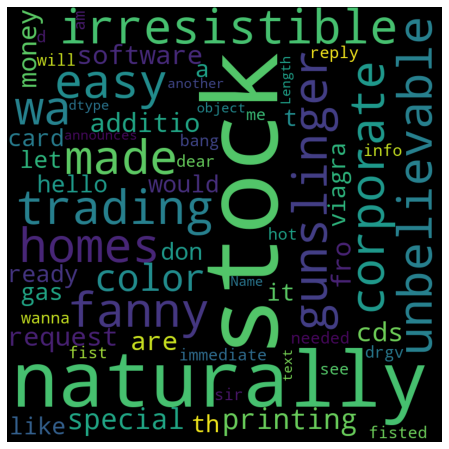

In [11]:
#Creating the word cloud for spam emails
data_spam = data.loc[data.spam==1]
#Generating word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(data_spam['text']))
#Plotting the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

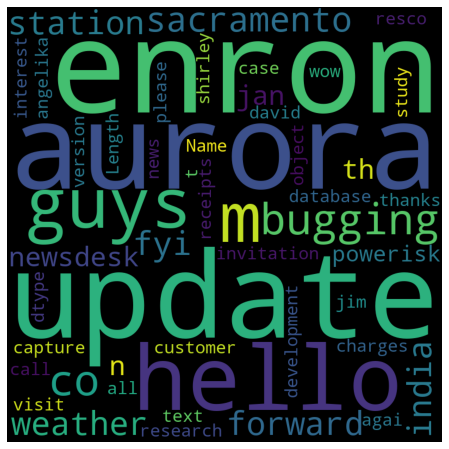

In [12]:
#Creating the word cloud for non spam emails
data_notspam = data.loc[data.spam==0]
#Generating word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(data_notspam['text']))
#Plotting the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

__Part 2: Spam Detection for email data__

- This is a binary classification problem since an email can be spam (1) or not spam (0)
- I'm building a machine learning model that can identify whether an email is spam or not
- I will explore about tokenization, vectorization and statistical algorithms while building this model

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, accuracy_score

In [14]:
#Implementing this on a sample text data
text = ["my name is santhosh", "i work as a data scientist", "it is exciting to work on this project"]

#Instantiating count vectorizer class
cv = CountVectorizer()
#Tokenizing and building vocab
cv.fit(text)

CountVectorizer()

Summarizing the parameters of count vectorizer

In [15]:
cv.vocabulary_

{'my': 5,
 'name': 6,
 'is': 3,
 'santhosh': 9,
 'work': 13,
 'as': 0,
 'data': 1,
 'scientist': 10,
 'it': 4,
 'exciting': 2,
 'to': 12,
 'on': 7,
 'this': 11,
 'project': 8}

In [16]:
vector = cv.transform(text)
vector.toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1]], dtype=int64)

In [17]:
#Now implementing this process to email data
text_vec = CountVectorizer().fit_transform(data['text'])

X_train, X_test, y_train, y_test = train_test_split(text_vec, data['spam'], test_size = 0.45, random_state=42, shuffle=True)

In [18]:
classifier = ensemble.GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.5,
            max_depth=6,
            )

In [19]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1926
           1       0.98      0.91      0.95       637

    accuracy                           0.97      2563
   macro avg       0.98      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563



This model is 97% accurate

__Part 3: Sentiment Analysis__

- In order to measure the sentiment, I'm going to use a library named 'Textblob' for processing textual data
- This library is simple to use and contains common NLP tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis etc.,
- Sentiment property returns 
    - Polarity in range [-1.0, 1.0] (-1 is the most negative and 1 is the most positive), 
    - Subjectivity in range [0.0,1.0] (0.0 is very objective and 1.0 is very subjective)

In [1]:
from textblob import TextBlob

In [20]:
#Loading the descriptions into textblob
emailBlob = [TextBlob(text) for text in data['text']]

In [21]:
#Adding the sentiment metrics to the dataframe
data['Polarity'] = [i.sentiment.polarity for i in emailBlob]
data['Subjectivity'] = [i.sentiment.subjectivity for i in emailBlob]
data.head()

,index,text,spam,Polarity,Subjectivity
0,0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581
3,3,subject color printing special request additio...,1,0.163492,0.468254
4,4,subject do not have money get software cds fro...,1,0.433333,0.395833


In [25]:
#Emails which are in negative tone
negative_email = data.loc[data.Polarity < 0]
negative_email

,index,text,spam,Polarity,Subjectivity
8,8,subject undeliverable home based business for ...,1,-0.011667,0.423333
18,18,subject security alert confirm your national c...,1,-0.166667,0.333333
30,30,subject want to accept credit cards aredit cpp...,1,-0.166667,0.333333
33,33,subject re just to her mdaemon has indentified...,1,-0.030303,0.360606
34,34,subject ms software titles available for downl...,1,-0.038181,0.467676
...,...,...,...,...,...
5664,5664,subject re probability question from vince s a...,0,-0.166667,0.333333
5665,5665,subject re lunch super jestesmy umowieni juliu...,0,-0.041667,0.416667
5675,5675,subject approval is overdue access request for...,0,-0.155556,0.277778
5683,5683,subject request submitted access request for j...,0,-0.155556,0.277778


In [28]:
#Emails which are in positive tone
positive_email = data.loc[data.Polarity > 0.5]
positive_email

,index,text,spam,Polarity,Subjectivity
20,20,subject any med for your girl to be happy your...,1,0.522222,0.597222
157,157,subject check this impotence medication don t ...,1,0.511111,0.411111
503,503,subject any med for your girl to be happy your...,1,0.522222,0.597222
569,569,subject any med for your girl to be happy your...,1,0.522222,0.597222
703,703,subject the man of stteel hello welcome to the...,1,0.538889,0.651389
785,785,subject any med for your girl to be happy your...,1,0.522222,0.597222
818,818,subject s of computer products on sale now com...,1,0.527778,0.627778
910,910,subject any med for your girl to be happy your...,1,0.522222,0.597222
928,928,subject your in home source of health informat...,1,0.508333,0.605556
993,993,subject maam does your man satisfy you how did...,1,0.508333,0.433333


__Based on this analysis we can see that emails which contain bad / unhappy text is more dominant when compared to emails with positive content__